<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/slicing/experment_perpose_UPENN_GBM_NIfTI_files_image_sliced_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import nibabel as nib

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
based_path = r"/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/dataset_64part_each_2dimg"

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(based_path)]

In [ ]:
len(train_data_ids)

8960

In [ ]:
train_ids=[]
for i in train_data_ids:
  test = i.split('dataset_64part_each_2dimg/')[1]
  train_ids.append(test)

In [ ]:
train_ids[0]

'124_z_25.png'

In [ ]:
final_ids =[]
for i in range(len(train_ids)):
  path = os.path.join(based_path,train_ids[i])
  image = cv2.imread(path)
  if image.max() != image.min():
    final_ids.append(train_ids[i])


In [ ]:
len(final_ids)

2820

In [ ]:
final_ids.sort()

In [ ]:
final_ids[0]

'000_z_29.png'

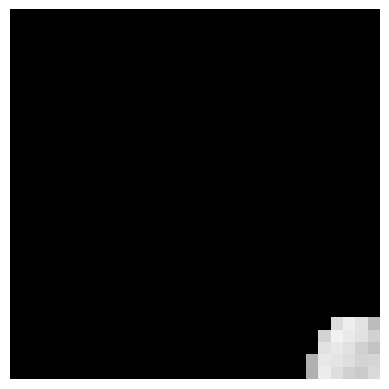

In [ ]:
# Load an image from file
path = os.path.join(based_path,final_ids[0])
image = cv2.imread(path)


plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [ ]:
image.shape

(30, 30, 3)

In [ ]:
final_ids.sort()
path = final_ids[0]
test = path.split('z_')[1]
test = test.split('.png')[0]
int(test)

29

In [ ]:
data_path = []
data_ids = []
desired_width = 128
desired_height = 128
for i in range(len(final_ids)):
    filename = final_ids[i]
    path = os.path.join(based_path,final_ids[i])
    img_data = cv2.imread(path)
    gray_image = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    #resized_image = cv2.resize(gray_image, (desired_width, desired_height), interpolation=cv2.INTER_LINEAR)
    if 'z_' in filename and '.png' in filename:
        test1 = filename.split('z_')[1]
        test = test1.split('.png')[0]
        data_path.append(gray_image)
        data_ids.append(int(test))

data_column = {'image_data': data_path,
        'class': data_ids}
data_set = pd.DataFrame(data_column)

In [ ]:
data_list = data_set['image_data'].tolist()
classes = data_set['class'].tolist()

In [ ]:
my_array = np.array(data_list)
y_data = np.array(classes)

In [ ]:
my_array.shape

(2820, 30, 30)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(my_array,y_data, test_size=0.10)

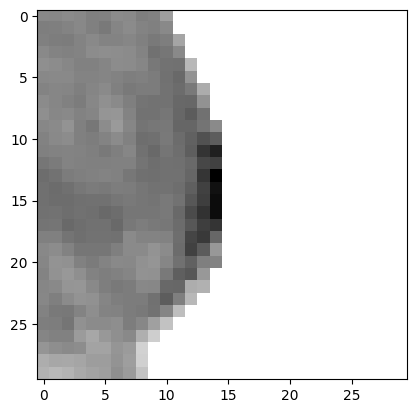

In [ ]:
from tensorflow.keras.utils import normalize

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
plt.imshow(x_train[1], cmap =plt.cm.binary)

In [ ]:
x_train = np.array(x_train).reshape(-1,30,30,1)
x_test = np.array(x_test).reshape(-1,30,30,1)
print(x_train.shape,x_test.shape)

(2538, 30, 30, 1) (282, 30, 30, 1)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation,Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3),padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(1024, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(2048, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 15, 15, 64)        0         
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=15
                             )
checkpointer = ModelCheckpoint(filepath="clf-resnet-weights.hdf5",
                               verbose=1,
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=5,
                              min_delta=0.0001,
                              factor=0.2
                             )

In [ ]:
h = model.fit(x_train, y_train, batch_size = 32, validation_split= 0.1, epochs=100, callbacks=[checkpointer, earlystopping, reduce_lr])

Epoch 1/100
72/72 [==============================] - ETA: 0s - loss: 3.8843 - accuracy: 0.0381
Epoch 1: val_loss improved from inf to 3.60727, saving model to clf-resnet-weights.hdf5
72/72 [==============================] - 159s 2s/step - loss: 3.8843 - accuracy: 0.0381 - val_loss: 3.6073 - val_accuracy: 0.0354 - lr: 0.0010
Epoch 2/100
72/72 [==============================] - ETA: 0s - loss: 3.4547 - accuracy: 0.0547
Epoch 2: val_loss improved from 3.60727 to 3.27100, saving model to clf-resnet-weights.hdf5
72/72 [==============================] - 155s 2s/step - loss: 3.4547 - accuracy: 0.0547 - val_loss: 3.2710 - val_accuracy: 0.0866 - lr: 0.0010
Epoch 3/100
72/72 [==============================] - ETA: 0s - loss: 3.2286 - accuracy: 0.0740
Epoch 3: val_loss improved from 3.27100 to 3.08248, saving model to clf-resnet-weights.hdf5
72/72 [==============================] - 159s 2s/step - loss: 3.2286 - accuracy: 0.0740 - val_loss: 3.0825 - val_accuracy: 0.1299 - lr: 0.0010
Epoch 4/100
72

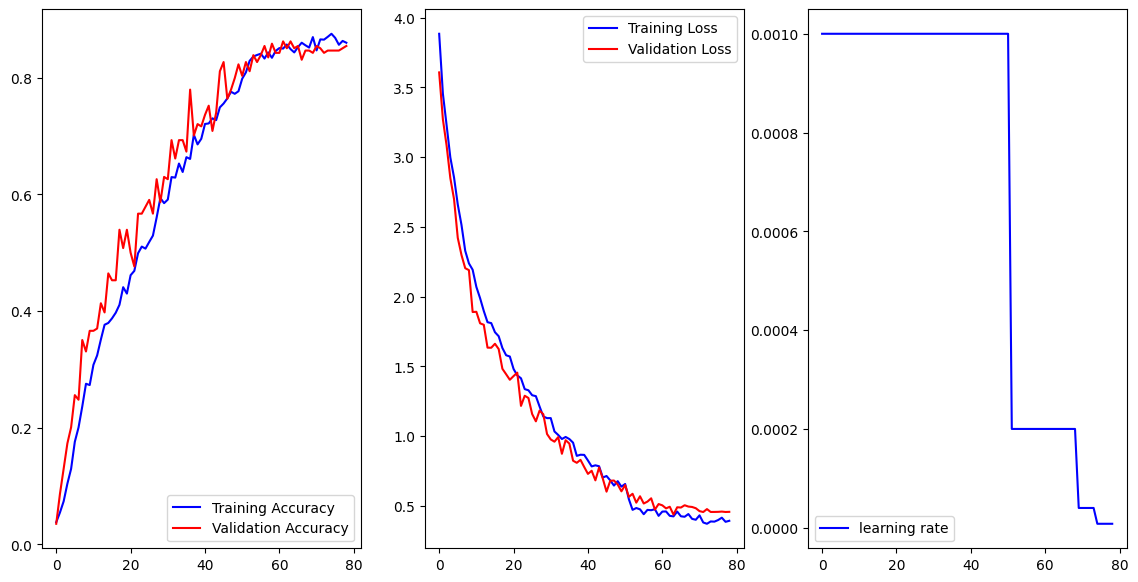

In [ ]:

acc=h.history['accuracy']
val_acc=h.history['val_accuracy']

epoch=range(len(acc))

loss=h.history['loss']
val_loss=h.history['val_loss']

learning_rate = h.history['lr']

f,ax=plt.subplots(1,3,figsize=(14,7))

ax[0].plot(epoch,acc,'b',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'r',label='Validation Accuracy')
ax[0].legend()

ax[1].plot(epoch,loss,'b',label='Training Loss')
ax[1].plot(epoch,val_loss,'r',label='Validation Loss')
ax[1].legend()


ax[2].plot(epoch,learning_rate,'b',label='learning rate')
ax[2].legend()



plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 9ms/step - loss: 0.5550 - accuracy: 0.8475


In [ ]:
prediction = model.predict(x_test)

9/9 [==============================] - 0s 4ms/step


In [ ]:
len(prediction)

282

In [ ]:
not_match = []
not_match_ids = []
for i in range(len(prediction)):
  x = np.argmax(prediction[i])
  if x != y_test[i]:
    not_match.append(prediction[i])
    not_match_ids.append(i)

In [ ]:
for i in not_match_ids:
  print("Ids : ",i, "pred :",np.argmax(prediction[i]), "actual :", y_test[i])

Ids :  41 pred : 19 actual : 26
Ids :  48 pred : 43 actual : 42
Ids :  64 pred : 44 actual : 28
Ids :  81 pred : 18 actual : 19
Ids :  82 pred : 31 actual : 39
Ids :  87 pred : 29 actual : 35
Ids :  101 pred : 52 actual : 44
Ids :  122 pred : 40 actual : 39
Ids :  136 pred : 31 actual : 39
Ids :  137 pred : 13 actual : 21
Ids :  193 pred : 30 actual : 23
Ids :  201 pred : 29 actual : 35
Ids :  242 pred : 38 actual : 47
Ids :  243 pred : 34 actual : 36
Ids :  258 pred : 46 actual : 54
Ids :  268 pred : 36 actual : 22
Ids :  279 pred : 31 actual : 38


In [ ]:
import pandas as pd

data = pd.read_excel('table4.xlsx')
df = pd.DataFrame(data)


In [ ]:
df

,No. Conv layer,Training Accuracy,Validation Accuracy,Test Accuracy,Training Loss,Validation Loss,Test Loss
0,1,0.9591,0.8933,0.8666,0.1139,0.3551,0.4967
1,2,0.9468,0.9100,0.9025,0.1355,0.2915,0.3440
2,3,0.9513,0.9317,0.9055,0.1288,0.1969,0.2515
3,4,0.9498,0.9567,0.9130,0.1263,0.1219,0.2651
4,5,0.9633,0.9167,0.9235,0.0865,0.3149,0.2721
5,6,0.9685,0.9217,0.9250,0.0712,0.2348,0.2346
6,7,0.9279,0.8683,0.8771,0.1911,0.3487,0.3566
7,8,0.4182,0.4167,0.4228,1.0171,0.9885,1.0150
8,9,0.4200,0.4167,0.4228,1.0179,0.9888,1.0150
9,10,0.4223,0.4178,0.4228,1.0186,0.9890,1.0180


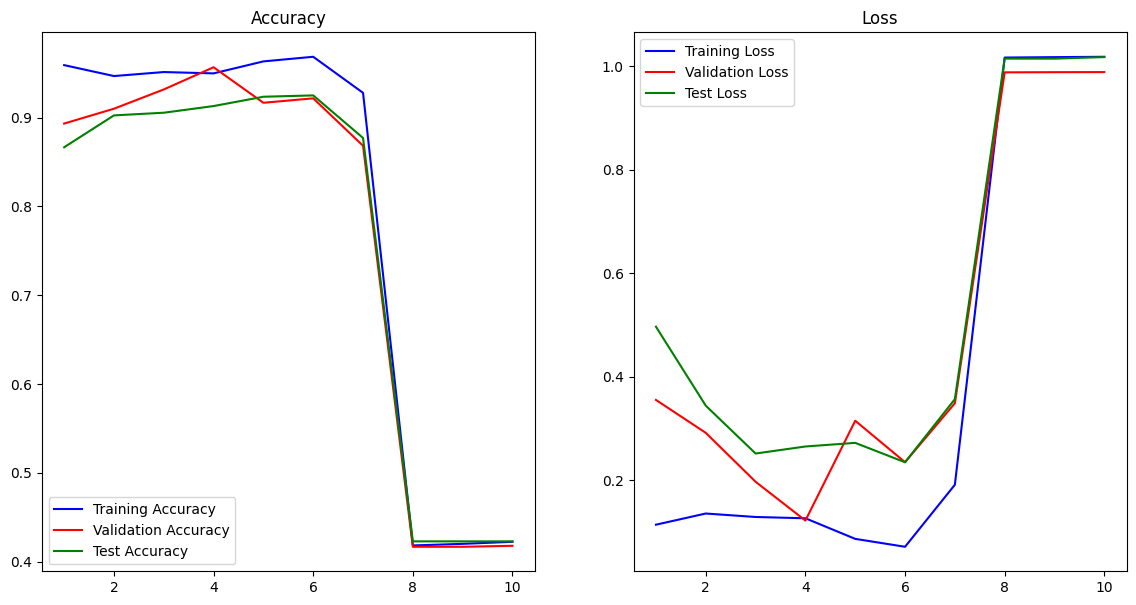

In [ ]:
acc= df['Training Accuracy']
val_acc=df['Validation Accuracy']
test_acc = df['Test Accuracy']

Noconvlayer=range(1,len(df['No. Conv layer'])+1)

loss= df['Training Loss']
val_loss=df['Validation Loss']
test_loss = df['Test Loss']

f, ax = plt.subplots(1, 2, figsize=(14, 7))

# First subplot for accuracy
ax[0].plot(Noconvlayer, acc, 'b', label='Training Accuracy')
ax[0].plot(Noconvlayer, val_acc, 'r', label='Validation Accuracy')
ax[0].plot(Noconvlayer, test_acc, 'g', label='Test Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

# Second subplot for loss
ax[1].plot(Noconvlayer, loss, 'b', label='Training Loss')
ax[1].plot(Noconvlayer, val_loss, 'r', label='Validation Loss')
ax[1].plot(Noconvlayer, test_loss, 'g', label='Test Loss')
ax[1].set_title('Loss')
ax[1].legend()

plt.show()